# Planet Packing

Gravity is a long-range force/effect that attracts all bodies with mass to each other.  If one considers two masses ($m_1$ and $m_2$) on nearby orbits around a central body $(m_o;\ m_1\ll m_o\ \&\ m_2\ll m_o)$, then it is expected that each mass will **perturb** the other mass' orbit causing it to either speed up or slow down a little.  However, if one body is substantially more massive or close enough, then the lower mass body can be scattered to a wide/eccentric orbit or escape the central body altogether.  Through numerical experiments involving scattering, it leads to a seemingly simple question:

- How close can two (or more) planets be separated such that scattering does not occur?

This question requires a few things to be defined so that limited numerical experiments can be performed.  For example, the above main question leads to four other sub-questions: 

1. How long is necessary to say that a scattering event will not occur?  
2. How do we measure the separation between orbits?
3. Is there a scale-free way to define the previous two questions?
4. Will our choice of initial orbital elements bias the potential outcomes?  If so, how to overcome this bias?

## Stellar lifetimes as a constraint on stability

Orbital stability often goes undefined, even though it can have multiple meanings.  Typically, it implies that a mass will remain on a *bound* orbit indefinitely (i.e., **Lagrange stability**; see [Hayashi et al. (2023)](https://iopscience.iop.org/article/10.3847/1538-4357/acac1e) or [Barnes & Greenberg (2006)](https://iopscience.iop.org/article/10.1086/507521/pdf)).  Using *indefinitely* as a timescale is not practical.  Scattering events can also transport a mass to a wider orbit without fully expelling the mass from the system.  To address the potential for scattering events, please review [updating the standard stability formulae](https://saturnaxis.github.io/exoplanet-binary/Tutorials/three-body-stability.html#updating-the-standard-stability-formulae) in the previous section.  Otherwise, we look to natural constraints on time to arrive at a more practical definition for stability. 

One natural constraint on the timescale for stability is the lifetime of the system.  To judge the lifetime of a system, we can look to astrophysics and the lifetimes of stars.  Consider the stability of the Solar System, where we might define it to be stable if *the planets remain on bound orbits for ${\sim}10\ {\rm Gyr}$*, or the main-sequence lifetime of a typical $\rm G2V$ star.  Even this definition has problems because the planet Mercury has a some probability of undergoing an instability (e.g., [Laskar & Gastineau (2009)](https://ui.adsabs.harvard.edu/abs/2009Natur.459..817L/abstract)) within the remainder of the Sun's main-sequence lifetime.  

**If Mercury is expelled from the Solar System, does that make the *whole* system unstable?** 

The short answer is *no* because the remaining planets will adjust/exchange their angular momentum until a new equilibrium is found (see [Laskar (1997)](https://ui.adsabs.harvard.edu/abs/1997A%26A...317L..75L/abstract)) and was worked out mathematically by Laplace in 1784.  This may have occurred in the past, where the giant planets' orbits were more compact ([Quarles & Kaib (2019)](https://ui.adsabs.harvard.edu/abs/2019AJ....157...67Q/abstract), [Nesvorny et al. (2018)](https://ui.adsabs.harvard.edu/abs/2018NatAs...2..878N/abstract), [Nesvorny (2011)](https://ui.adsabs.harvard.edu/abs/2011ApJ...742L..22N/abstract)).  The giant planets may have mutually scattered their orbits and resulted in the configuration we see today.  An example simulation of this process can be found at [www.billyquarles.com/latest-research](https://www.billyquarles.com/latest-research).

The main-sequence lifetime of stars can be determined numerically given that we have some accurate estimates for a given star's composition (e.g., hydrogen, helium, and metal mass fraction).  The details can be found in a chapter on stellar evolution in [Modern Astrophysics](https://saturnaxis.github.io/ModernAstro/Chapter_13/stellar-evolution.html).  The general estimate of main-sequence stellar lifetime $\tau_{\rm ms}$ is that it is proportional to the inverse-cube of the stellar mass, $\tau_{\rm ms} \propto M^{-3}$.  Through the proportionality, we can scale other stars relative to our Sun.  For example, a $10\ M_\odot$ star's lifetime is $10^{-3}$ times $10\ {\rm Gyr}$, or $1\ {\rm Myr}$.  See the lecture from Jason Kendall below for a general overview.

<div align="center">

<iframe width="560" height="315"
src="https://www.youtube.com/embed/tez2s9aOSuM"
frameborder="0" 
allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" 
allowfullscreen></iframe>

</div>


## Scaling a planetary system using the Hill Radius

### From Lagrange points to the Hill radius

In the three-body problem, the relative gravitational influence on a third body can be determined in which there are five special locations called the [Lagrange points](https://en.wikipedia.org/wiki/Lagrange_point).  These points define extrema in the gravitational potential, where the **net** gravitational force on the third body vanishes.  Additionally, they correspond to high and low topological levels of pseudopotential $U$.  This pseudopotential exists within a rotated reference frame, where two massive bodies appear at fixed locations and a third body reacts to the presence of the massive primaries.  

Consider two massive primaries lying along the $x$-axis of a reference coordinate system with the center of mass (barycenter) at the origin.  Since the barycenter lies at the origin, then the center of mass can be determined using:

\begin{align}
0 &= m_o x_o + m_1 x_1, \qquad {\rm where}\ m_o > m_1;\\
a_{\rm bin} &= |x_o| + |x_1|, \\
x_o &= -\frac{m_1}{m_o+m_1}a_{\rm bin}, \\
x_o &= -\mu a_{\rm bin}, \quad {\rm and}\quad x_1 = (1-\mu)a_{\rm bin}.
\end{align}

Two intermediate constants: the binary semimajor axis $a_{\rm bin}$ and mass ratio $\mu$ are introduced to simplify the notation, but they also provide a convenient means to scale the problem.  The above analysis can be extended into two dimensions using the pseudopotential $U$:

\begin{align}
U(x,y) & = \frac{1-\mu}{r_o} + \frac{\mu}{r_1} + \frac{n^2}{2}\left(x^2+y^2\right), \\
r_o &= \sqrt{(x+\mu)^2 + y^2}, \\
r_1 &= \sqrt{[x-(1-\mu)]^2 + y^2}.
\end{align}

The first two terms are simply the gravitational potential relative to each of the masses ($m_o\ \&\ m_1$) measured by the respective radii ($r_o\ \&\ r_1$).  But the last term arises from the rotated coordinate system as a centrifugal potential.

```{note}
The coordinates in the pseudopotential are also scaled by the binary semimajor axis $a_{\rm bin}$.  In these coordinates, the mean motion $n = 1$.  If you want to express everything in non-scaled coordinates, the $\mu$ and $(1-\mu)$ need to be replaced with $x_o$ and $x_1$, respectively.
```

Taking the partial derivatives of the pseudopotential $U$ leads to deriving the forces within the rotated coordinate system (i.e., $F = -\nabla U$).  Integrating the full equations of motion derived from the pseudopotential leads to the [Jacobi Integral](https://en.wikipedia.org/wiki/Jacobi_integral) and the associated constant of motion, the Jacobi constant $C_J$.  The Jacobi constant is given mathematically as:

\begin{align}
C_J = 2U - v^2,
\end{align}

which is similar in appearance to an energy relation.  It is not because we are considering the restricted problem ($m_2\ll m_1 < m_o$), where energy and angular momentum aren't conserved.   

**Why do we bother with the rotated coordinate system?**  Special boundaries arise that constrain the motion of the smaller mass.  These boundaries are called the **zero velocity contours** (ZVC), which are defined when $v=0$ as the name suggests.  As a result, the Jacobi constant for the ZVC is $C_J = 2U$.  Using the ZVC, we can illustrate the extent of gravitational influence of each mass $m_o$ and $m_1$.

The existence of a given contour depends on the value of the Jacobi constant, which in turn depends on the mass ratio $\mu$ and initial semimajor axis ratio $\rho$ through the pseudopotential.  To identify a *closed* contour, we must choose initial values in $\mu$ and $\rho$ so that the contour is continuous through the inner Lagrange point $L_1$.  Fortunately, [Quarles et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020AJ....159...80Q/abstract) provides a table for the circular restricted three body problem. 

Using the Sun-Jupiter system ($\mu \approx 0.999$), the critical semimajor axis ratio $\rho \approx 0.33$.  The python code below illustrates the closed contour around the Sun (yellow dot) and a much smaller closed contour enclosing Jupiter (orange dot) using units of Jupiter's semimajor axis $a_J$.  The red `x` symbols mark the locations of the Lagrange points.  The filled gray area marks a *forbidden* region, where the Jacobi constant $C_J > 2U$.  For this to occur, the particle would have a *complex* velocity $v$, or $v^2<0$.  If we force the velocity to be a real number, then it shifts the physical interpretation so that the particle mass is imaginary.  These solutions are deemed unphysical and hence, forbidden.

```{note}
The lowest value in the Jacobi constant occurs for the $L_4$ and $L_5$ Lagrange points.  This shows why Jupiter is still has asteroids (i.e., *Trojans*) orbiting at these locations
```


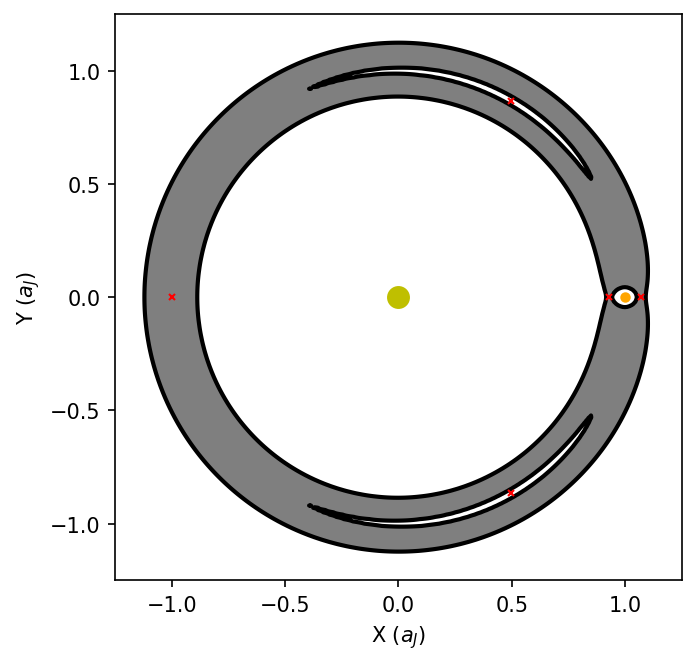

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

def pseudo_pot(x,y,mu):
	sign = 1
	if mu >= 0.5:
		sign = -1 #flip the sign to maintain orientation
	ro = np.sqrt((x+sign*mu)**2+y**2)
	r1 = np.sqrt((x-sign*(1.-mu))**2+y**2)
	U = (1.-mu)/ro + mu/r1 + (x**2+y**2)/2.
	return 2.*U 

def calc_ZVC(rho):
	CK = mu + 2.*mu*rho  + (1.-mu)/rho + 2.*mu/(1.+rho) + 2.*np.sqrt(rho*(1.-mu)) + mu*(1.-mu)
	return CK

mu = 0.999
alpha = 1 - mu
rho = 0.0329
C1 = calc_ZVC(rho)

if mu <=0.5:
	L1 = (mu/3.)**(1./3)
	L3 = -(1.+(5*mu/12.))
else:
	L1 = (alpha/3.)**(1./3)
	L3 = -(1.+(5*alpha/12.))

cmap = cm.gnuplot
my_cmap = cm.get_cmap(cmap)
norm = colors.Normalize(0,1)
cmmapable = cm.ScalarMappable(norm,my_cmap)
cmmapable.set_array(range(0,1))
my_cmap.set_under('k')

x_color='r'
ms = 3

X = np.arange(-1.5,1.5,0.01)
Y = np.arange(-1.5,1.5,0.01)
xx,yy = np.meshgrid(X,Y)
Z = pseudo_pot(xx,yy,mu) 

fig = plt.figure(1,figsize=(5,5),dpi=150)
ax = fig.add_subplot(111,aspect='equal')

ax.contourf(X,Y,Z,levels=[3,C1],cmap=cm.binary)
ax.contour(X,Y,Z,levels=[3,C1],colors='k',linestyles='solid',linewidths=2)

ax.plot(-(1-mu),0,'y.',ms=20)
ax.plot(mu,0,'.',color='orange',ms=8)
ax.plot(1-L1,0,'x',color=x_color,ms=ms)
ax.plot(1+L1,0,'x',color=x_color,ms=ms)
ax.plot(L3,0,'x',color=x_color,ms=ms)
ax.plot(0.5 - alpha,np.sqrt(3.)/2.,'x',color=x_color,ms=ms) # for $mu <= 0.5 this should be 0.5 - mu
ax.plot(0.5 - alpha,-np.sqrt(3.)/2.,'x',color=x_color,ms=ms)
		
ax.set_xlim(-1.25,1.25)
ax.set_ylim(-1.25,1.25)
ax.set_ylabel("Y $(a_J)$")
ax.set_xlabel("X $(a_J)$");

Below is a python code that computes the ZVC using many values of the Jacobi constant $(C_J = 3,\ 3.05,\ 3.1,\ 3.15)$ for the Earth-Moon system.  Three of the Lagrange points (black dots) are *collinear*, while the remaining two are the *triangular* Lagrange points.  Particles that start near $L_4$ or $L_5$ are bound within the lobe-shaped contours.  

Interior to the gray contours lie regions where either the Earth or Moon dominate in the gravitational tug-of-war and delineate each body's [Hill Sphere](https://en.wikipedia.org/wiki/Hill_sphere).  The use of 'sphere' isn't mathematically correct, where the generalization of the region to three dimensions is actually an ellipsoid.  This can be seen in that the region around the Moon is more squashed in the vertical compared to the horizontal extent.

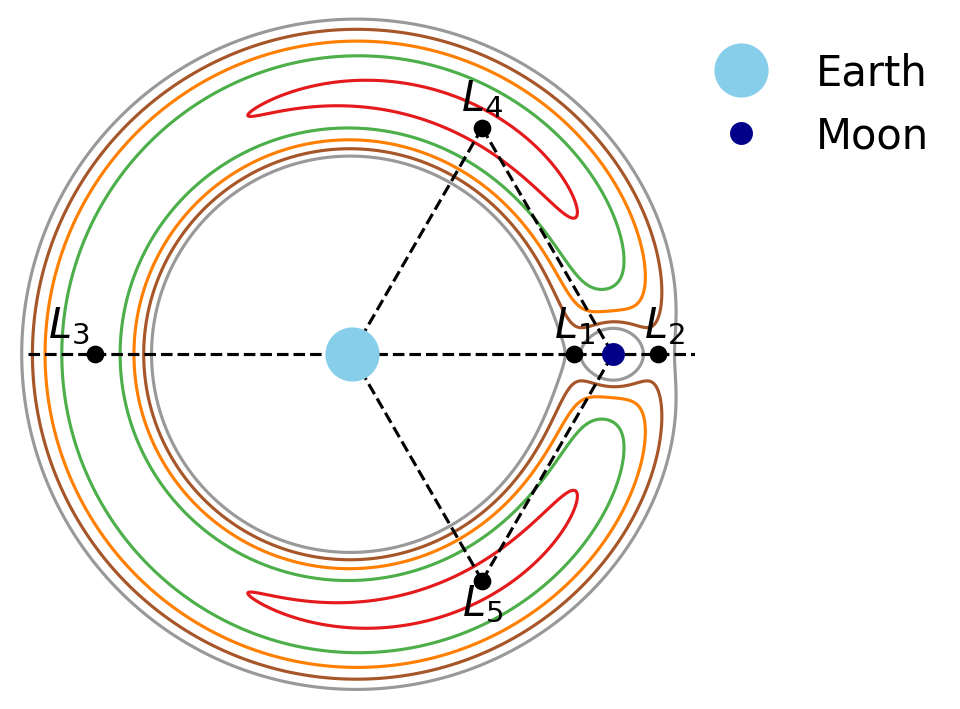

In [69]:
import numpy as np
import matplotlib.pyplot as plt

def potential(x,y):
	ro = np.sqrt((x+mu)**2+y**2)
	r1 = np.sqrt((x-(1.-mu))**2+y**2)
	U = (1.-mu)/ro + mu/r1 + (x**2+y**2)/2.
	return 2.*U 

mu = 1./81.
xi = np.arange(-2.,2.,0.001)
yi = np.arange(-2.,2.,0.001)
xx,yy = np.meshgrid(xi,yi)
zi = potential(xx,yy)
L1 = (mu/3.)**(1./3)
L3 = -(1.+(5*mu/12.))
L4 = 0.5-mu
col = 'k'
mark = '.'
ms = 15

fig  = plt.figure(figsize=(6,6),dpi=150)
ax = fig.add_subplot(111,aspect='equal')

#ax.plot((1.-mu)*np.cos(theta),(1.-mu)*np.sin(theta),'k-',lw=2)
CS = ax.contour(xi,yi,zi,np.arange(3,3.2,0.05),cmap=plt.cm.Set1)
ax.plot([-1.25,1.35],[0,0],'k--',ms=1.5)
ax.plot(1.-L1,0,marker=mark,color=col,ms=ms)
ax.text(1.-L1,0.065,'$L_1$',fontsize=20,horizontalalignment='center')
ax.plot(1.+L1,0,marker=mark,color=col,ms=ms)
ax.text(1.+L1+0.025,0.065,'$L_2$',fontsize=20,horizontalalignment='center')
ax.plot(L3+mu,0,marker=mark,color=col,ms=ms)
ax.text(L3-0.1+mu,0.065,'$L_3$',fontsize=20,horizontalalignment='center')
ax.plot(L4,np.sqrt(3)/2.,marker=mark,color=col,ms=ms)
ax.text(L4,np.sqrt(3)/2.+0.065,'$L_4$',fontsize=20,horizontalalignment='center')
ax.plot(L4,-np.sqrt(3)/2.,marker=mark,color=col,ms=ms)
ax.text(L4,-np.sqrt(3)/2.-0.135,'$L_5$',fontsize=20,horizontalalignment='center')

ax.plot([L4,-mu],[np.sqrt(3.)/2.,0],'k--',lw=1.5)
ax.plot([L4,1.-mu],[np.sqrt(3.)/2.,0],'k--',lw=1.5)
ax.plot([L4,-mu],[-np.sqrt(3.)/2.,0],'k--',lw=1.5)
ax.plot([L4,1.-mu],[-np.sqrt(3.)/2.,0],'k--',lw=1.5)

ax.plot(-mu,0,'.',mfc='skyblue',mec='skyblue',ms=50,label='Earth')
ax.plot(1.-mu,0,'.',mfc='darkblue',mec='darkblue',ms=20,label='Moon')
#ax.plot(0,0,'kx',ms=5,label="CoM")

ax.legend(bbox_to_anchor=(1.1, .5, .3, .5),numpoints=1,fontsize=20,frameon=False)
ax.set_xlim(-1.3,1.3)
ax.set_ylim(-1.3,1.3)
ax.axis('off');

The appearance of the contours change with the mass ratio, which can be seen below if we consider the Sun-Earth system instead.  The inset panel zooms in on the region around the Earth and is scaled using the Hill radius $R_H$.  The Hill radius is defined using the mass ratio $\mu$ and the binary separation $a_{\rm bin}$:

\begin{align}
R_H = a_{\rm bin}\left(\frac{\mu}{3}\right)^{1/3}.
\end{align}

Note that this definition is the result of an *approximation* that assumes circular orbits, where an additional term $(1-e_{\rm bin})$ would be necessary if the binary orbit were elliptical.  The definition effectively becomes 

```{math}
:label: min_RH
R_H &\approx q_{\rm bin}\left(\frac{\mu}{3}\right)^{1/3}, \\
q_{\rm bin} &= a_{\rm bin}(1-e_{\rm bin}).
```

[3.00000347 3.0008897  3.00093672 3.00095947 3.00106035 3.00124328
 3.0012661  3.00147675 3.00175584 3.00240875 3.03227121 3.69332466
 6.75659148]


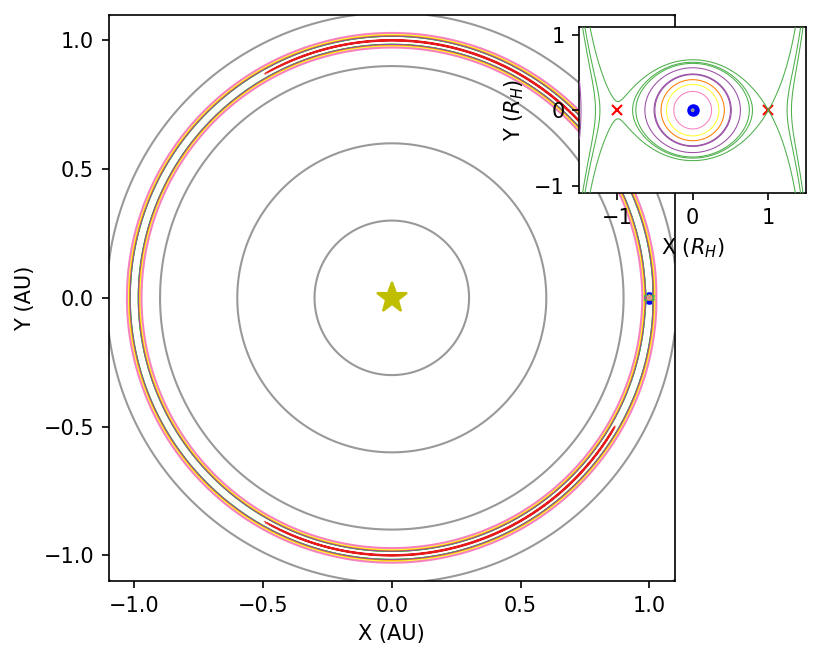

In [79]:
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.colors as cm

def Jacobi_const(x,y,xo,yo,x1,y1):
    ro = np.sqrt((x-xo)**2+(y-yo)**2) #distance from particle to the Sun
    r1 = np.sqrt((x-x1)**2+(y-y1)**2) #distance from particle to the Earth
    phi = (1.-mu)*(ro**2/2. + 1./ro) + mu*(r1**2/2. + 1./r1)
    return 2*phi

G = 4*np.pi**2
M_sun = 1 # 1 solar mass
M_E = 3.0035e-6 #mass of Earth in M_sun
mu = M_E/(M_E+M_sun)
R_H = (mu/3)**(1./3.)
x_E, y_E = (1-mu), 0
x_S, y_S = -mu, 0

r_levels = [0.3,0.6,0.9]
for i in range(1,10):
    r_levels.append(1+i*0.25*R_H)
n_lev = len(r_levels)
Z_levels = np.zeros(n_lev+1)
for r in range(0,n_lev):
    Z_levels[r] = Jacobi_const(r_levels[r],0,x_S,y_S,x_E,y_E)
Z_levels[-1] = Jacobi_const(0.5-x_E,np.sqrt(3)/2,x_S,y_S,x_E,y_E)
Z_levels.sort()
print(Z_levels)

fig = plt.figure(figsize=(5,5),dpi=150)
ax = fig.add_subplot(111, aspect='equal')
axins = inset_axes(ax, width="40%", height="40%",bbox_to_anchor=(0.25, 0.05, 1, 1), bbox_transform=ax.transAxes)
axins.set_aspect('equal')

ax.plot(x_S,y_S,'y*',ms=15)
ax.plot(x_E,y_E,'b.',ms=10)
axins.plot(0,0,'b.',ms=10)
axins.plot(1,0,'rx',ms=5)
axins.plot(-1,0,'rx',ms=5)

xi = np.arange(x_E-1.5*R_H,x_E+1.5*R_H,0.01*R_H)
yi = np.arange(y_E-1.1*R_H,y_E+1.1*R_H,0.01*R_H)
xx,yy = np.meshgrid(xi,yi)
Z = Jacobi_const(xx,yy,x_S,y_S,x_E,y_E)

vmin, vmax = 3, 3.003
my_cmap = plt.colormaps['Set1']
norm = cm.Normalize(vmin=vmin, vmax=vmax)
#my_cmap.set_under('k')

ax.contour(xx,yy,Z, levels=Z_levels,zorder=5,cmap=my_cmap,norm=norm)
axins.contour((xx-x_E)/R_H,yy/R_H,Z, levels=Z_levels,zorder=5,cmap=my_cmap,norm=norm,linewidths=0.5)
axins.set_xlabel("X ($R_H$)")
axins.set_ylabel("Y ($R_H$)")

xi = np.arange(-1.1,1.1,0.001)
yi = np.arange(-1.1,1.1,0.001)
xx,yy = np.meshgrid (xi,yi)
Z = Jacobi_const(xx,yy,x_S,y_S,x_E,y_E)
ax.contour(xx,yy,Z, levels=Z_levels,zorder=2,cmap=my_cmap,norm=norm,linewidths=1)
ax.set_ylabel("Y (AU)")
ax.set_xlabel("X (AU)")
ax.set_yticks(np.arange(-1,1.5,0.5))
ax.set_xticks(np.arange(-1,1.5,0.5));

The squashing in the vertical (see panel inset) is even more obvious in this regime.  [Rosario-Franco et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020AJ....159..260R/abstract) shows using numerical simulations that the orbital stability of satellites are limited to ${\sim}0.4\ R_H$ for a host planet on a circular orbit.  The stability decreases as the host planet's orbit is more eccentric, as we may naively expect from Eqn. {eq}`min_RH`.  The orbital stability formula for prograde ([Rosario-Franco et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020AJ....159..260R/abstract)) and retrograde ([Quarles et al. (2021)](https://ui.adsabs.harvard.edu/abs/2021AJ....162...58Q/abstract)) are:

\begin{align}
a_{\rm crit}(R_H) &= 0.4061(1 - 1.1257e_p), \qquad &{\rm (prograde)} \\
a_{\rm crit}(R_H) &= 0.668(1 - 1.236e_p). \qquad &{\rm (retrograde)}
\end{align}

The above formula demonstrate that *general* expressions for orbital stability are possible that **scale** with the observationally measurable parameters.  Typical observations can determine the **semimajor axis** through either photometric modeling or analysis using the measured radial velocity curve.  If the system is favorable (i.e., edge on), then the **masses** can also be determined and with many more observations, the eccentricity can be estimated.  The Hill radius directly depends on the semimajor axis and masses, $R_H = a_{\rm bin}(\mu/3)^{1/3}$.

### Mutual Hill radius and scaling

The Hill radius is strictly defined for a three body system, but can the idea be expanded to include systems of multiple planets.  One of the first papers to investigate this idea with a specific application comes from [Gladman (1993)](https://ui.adsabs.harvard.edu/abs/1993Icar..106..247G/abstract).  There were previous works  in the 1980s that use [algebraic topology](https://en.wikipedia.org/wiki/Algebraic_topology) to characterize orbits using their energy and angular momentum (see [Marchal & Bozis (1982)](https://ui.adsabs.harvard.edu/abs/1982CeMec..26..311M/abstract)).  [Gladman (1993)](https://ui.adsabs.harvard.edu/abs/1993Icar..106..247G/abstract) wanted to apply the earlier works towards the problem of two nearby planets orbiting a single star.  

This first section is following the notation given in [Gladman (1993)](https://ui.adsabs.harvard.edu/abs/1993Icar..106..247G/abstract), but we should be bound by notation.  If you review the literature that stems from [Gladman (1993)](https://ui.adsabs.harvard.edu/abs/1993Icar..106..247G/abstract), you'll find that there isn't a consistent notation that everyone agrees to use anyway.

The central body (i.e., host star) has a mass $m_3$, which is orbited by two planets on concentric orbits with masses $m_1$ (inner orbit) and $m_2$ (outer orbit).  The semimajor axis of the inner orbit $a_1 = 1$.  If you scale the problem by this inner orbit, it will also be equal to unity while the outer orbit $a_2$ will be some (real) multiple of the inner orbit (e.g., $a_2 = 1.5 a_1$).  The planets begin with a differential initial longitude of $180^\circ$ ($\delta f = f_2 - f_1 = 180^\circ$).  

```{figure-md} Gladman_setup
<img src="planetpacking/Gladman_Fig01.png" alt="Gladman setup"  width="400px">

Initial setup used to define the initial separation $\Delta$ ([Gladman (1993)](https://ui.adsabs.harvard.edu/abs/1993Icar..106..247G/abstract)).
```

Figure {numref}`{number}<Gladman_setup>` illustrates that we can then parametrize the initial separation of orbits using $\Delta = a_2 - a_1$, or $a_2 = 1 + \Delta$ in normalized units.  Through another transformation, the separation $\Delta$ can be written in terms of Hill's coordinates (see [Henon \& Petit (1986)](https://ui.adsabs.harvard.edu/abs/1986CeMec..38...67H/abstract)), which scale with the Hill radius $R_H$.  If we normalize with respect to the Hill radius, then we define

\begin{align}
\Delta_H &= \frac{a_2 - a_1}{R_H}.
\end{align}

The above expression appears straightforward if you assume that $R_H$ describes the Hill radius of $m_1$.  Then $\Delta_H$ is describing the separation between the two orbits **in units of $R_H$**.  However, it's not as clear once you expand to more than two planets or if you want to vary the planetary masses.  

[Gladman (1993)](https://ui.adsabs.harvard.edu/abs/1993Icar..106..247G/abstract) does show a critical value of $\mathbf{\Delta_H = 2\sqrt{3}}$ for two planets on *initially circular* orbits.  This is not a bad assumption if you consider arguments from planet formation where it is expected that the planetary eccentricity could be significantly damped due to drag forces within the protoplanetary disk resulting in near circular orbits.

A few years later, [Chambers et al. (1996)](https://ui.adsabs.harvard.edu/abs/1996Icar..119..261C/abstract) take a slightly different approach by defining the mutual Hill radius.  The mutual Hill radius uses the total mass interior to the $j+1^{\rm th}$ planet's orbit $M_j$ and the average semimajor axis of the $j^{\rm th}$ and $j+1^{\rm th}$ planet.  Mathematically, this is expressed as

\begin{align}
R_{H_{j,j+1}} &= \frac{a_j + a_{j+1}}{2} \left[ \frac{m_j+m_{j+1}}{3M_j} \right]^{1/3}, \\
M_j &= \sum_{j=1}^j m_j.
\end{align}

When using this formalism to setup a planetary system, the value for $a_{j+1}$ is not known *a priori*.  It can be written explicitly in terms of $a_{\rm j}$, the masses ($m_j$, $m_{j+1}$, $M_j$), and $\Delta_H$.  

```{note}
The symbol representing the Hill spacing $\Delta_H$ varies among different authors, where [Pu & Wu (2015)](https://ui.adsabs.harvard.edu/abs/2015ApJ...807...44P/abstract) use $K$ and [Smith & Lissauer (2009)](https://ui.adsabs.harvard.edu/abs/2009Icar..201..381S/abstract) use $\beta$.  For consistency here, $\Delta_H$ is used.
```

The explicit formula to define $a_k$, the semimajor axis of the $k^{\rm th}$ planet, is given as

\begin{align}
a_k &= a_j \left[\frac{1+\Delta_H X}{1-\Delta_H X} \right]^{k-j}, \\
X &= \frac{1}{2}\left(\frac{m_j+m_{k}}{3M_j} \right)^{1/3},
\end{align}

where $k>j$ and are both integers ([Obertas et al. 2017](https://ui.adsabs.harvard.edu/abs/2017Icar..293...52O/abstract)).  This general formula can be applied for $k = j + 1$ to obtain a recursive formula as well.

The python code demonstrates the setup from [Gladman (1993)](https://ui.adsabs.harvard.edu/abs/1993Icar..106..247G/abstract) using an inner Jupiter-mass planet and outer Earth-mass planet separated by $5\ R_{H,m}$, mutual Hill radii, for a 2-planet system.

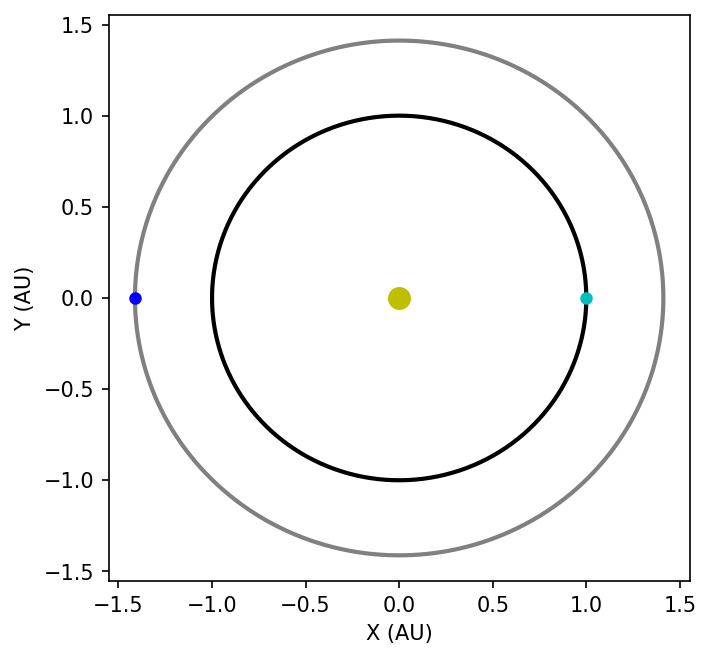

In [175]:
import numpy as np 
import matplotlib.pyplot as plt

M_star = 1 #central mass in M_sun
m_1 = 9.54e-4 #Jupiter mass in M_sun
m_2 = 3.0035e-6 #Earth mass in M_sun

a_1 = 1 #inner orbit in normalized units (1 AU)
X = 0.5*((m_1+m_2)/(3*(M_star+m_1)))**(1./3.)
delta_H = 5

def calc_orbit(a,e,omg):
    #calculate Cartesian orbit given a, e, omega
    f = np.arange(0,2*np.pi,0.01) 
    r = a*(1-e**2)/(1.+e*np.cos(f))
    return (r*np.cos(omg+f), r*np.sin(omg+f))

def get_semi(delta_H,a_j,X,k,j):
    #calculate a_k given a_j
    return a_j*((1+delta_H*X)/(1-delta_H*X))**(k-j)

a_2 = get_semi(delta_H,a_1,X,2,1)
x_1,y_1 = calc_orbit(a_1,0,0)
x_2,y_2 = calc_orbit(a_2,0,np.pi)

fig = plt.figure(figsize=(5,5),dpi=150)
ax = fig.add_subplot(111)

ax.plot(0,0,'.',color='y',ms=20)
ax.plot(x_1,y_1,'k-',lw=2)
ax.plot(x_1[0],y_1[0],'c.',ms=10)
ax.plot(x_2,y_2,'-',color='gray',lw=2)
ax.plot(x_2[0],y_2[0],'b.',ms=10)

ax.set_xlabel("X (AU)")
ax.set_ylabel("Y (AU)");

## The Golden ratio to debias the initial orbital phase

The setup from [Gladman (1993)](https://ui.adsabs.harvard.edu/abs/1993Icar..106..247G/abstract) starts the two planets at opposition.  This is not a completely arbitrary choice for the initial phase of the orbits.  There are two processes at play over the first few orbits: **a)** interplanetary perturbation through gravity and **b)** differences in mean motion.

Suppose we started both planets from circular orbits with the same true anomaly $f=0^\circ$ (i.e., **opposition**).  The inner planet would begin its orbit not with the single dominant force from the host star, but with a significant perturbation from the outer planet (due to the close *relative* proximity).  The force from the host star is still larger due to the stellar mass, but the outer planet is leveraging its closer proximity to make up for its much lower mass.  We could start the planets a slightly different true anomalies to account for this initial bias in forcing, where the mitigation of this bias appears to be achieved at **conjunction** (i.e., differential true anomaly $\Delta f = 180^\circ$).

The above argument is only half of the story.  From [Kepler's third law](https://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion) of planetary motion, the orbital period of a planet with a square proportionally with the planetary semimajor axis cubed ($T_p^2 \propto a_p^3$).  The mean motion $n$ is simply converting the orbital period into an orbital frequency (e.g., $n = 2\pi/T_p$).  Each planet orbits with a different frequency, where more distant planets have a lower frequency.  

Even though the planets start out with a large differential true anomaly, this will not be true for long.  The faster inner planet will catch up to the outer planet and be introduced to the outer planet's perturbation within a half-orbit of each planet.  The inner planet will experience repeated perturbations each orbit, but the force from each perturbation ('kick') may not always be along the same direction of motion resulting in random gravitational kicks.  If the perturbations occur at periodic intervals, then orbital resonance can destabilize the orbit by increasing the inner planet's orbital speed (i.e., increasing its orbital eccentricity), which can lead to orbit crossing.  See the video below for a refresher on orbital resonance.

<div align="center">

<iframe width="560" height="315"
src="https://www.youtube.com/embed/qDHKveVSc0Y"
frameborder="0" 
allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" 
allowfullscreen></iframe>

</div>

Orbital resonances occur at any periodic (integer) ratio, where the setup by [Gladman (1993)](https://ui.adsabs.harvard.edu/abs/1993Icar..106..247G/abstract) introduces a bias when the planets begin near a 2:1 resonance (i.e., two inner planet orbits for every orbit of the outer planet).  To address this issue, we can take some advice from different patterns found in nature.  One pattern emerges from plants, where they orient themselves to catch the maximum attention from pollinators (e.g., sunflowers) or the maximum area to receive sunlight.  The video below demonstrates this pattern at about 14:00 with pine cones and pineapples.

<div align="center">

<iframe width="560" height="315"
src="https://www.youtube.com/embed/1Jj-sJ78O6M"
frameborder="0" 
allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" 
allowfullscreen></iframe>

</div>

The pattern can be seen again in the spiral arms of galaxies, which is explained in detail in the video below.

<div align="center">

<iframe width="560" height="315"
src="https://www.youtube.com/embed/sj8Sg8qnjOg"
frameborder="0" 
allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" 
allowfullscreen></iframe>

</div>

Since our goal is to avoid orbital resonances (i.e., rational numbers), we must seek out an irrational number.  The most irrational number is the [golden ratio](https://en.wikipedia.org/wiki/Golden_ratio) $\varphi$, which can ironically be represented by a ratios:

\begin{align}
\varphi = \frac{1 + \sqrt{5}}{2} = 1.618033988749\ldots, \\
\varphi^{-1} = \varphi - 1 = 0.618033988749\ldots,
\end{align}

and can be related to [Fibonacci numbers](https://en.wikipedia.org/wiki/Fibonacci_number).

[Smith & Lissauer (2009)](https://ui.adsabs.harvard.edu/abs/2009Icar..201..381S/abstract) and [Quarles & Lissauer (2018)](https://ui.adsabs.harvard.edu/abs/2018AJ....155..130Q/abstract) use the Golden ratio to initialize the orbits of multiple planet systems.  This is done simply by taking integer multiples of $\phi$ to define the initial mean/true anomaly of each planet.  Mathematically, we get

\begin{align}
f_n = (n\varphi \cdot 360^\circ) \mod 360^\circ,\ \qquad (n\geq 1)
\end{align}

where the ${\rm mod}$ operator refers to the [modulo](https://en.wikipedia.org/wiki/Modulo) that returns the remainder to keep the result within the bounds of $0-360^\circ$.  To convert the above scheme into radians, simply replace $360^\circ$ with $2\pi$.

## A sample simulation

## References

- [Barnes & Greenberg (2006)](https://iopscience.iop.org/article/10.1086/507521/pdf)
- [Chambers et al. (1996)](https://ui.adsabs.harvard.edu/abs/1996Icar..119..261C/abstract)
- [Gladman (1993)](https://ui.adsabs.harvard.edu/abs/1993Icar..106..247G/abstract)
- [Hayashi et al. (2023)](https://iopscience.iop.org/article/10.3847/1538-4357/acac1e)
- [Henon \& Petit (1986)](https://ui.adsabs.harvard.edu/abs/1986CeMec..38...67H/abstract)
- [Laskar (1997)](https://ui.adsabs.harvard.edu/abs/1997A%26A...317L..75L/abstract)
- [Marchal & Bozis (1982)](https://ui.adsabs.harvard.edu/abs/1982CeMec..26..311M/abstract)
- [Nesvorny (2011)](https://ui.adsabs.harvard.edu/abs/2011ApJ...742L..22N/abstract)
- [Nesvorny et al. (2018)](https://ui.adsabs.harvard.edu/abs/2018NatAs...2..878N/abstract)
- [Obertas et al. 2017](https://ui.adsabs.harvard.edu/abs/2017Icar..293...52O/abstract)
- [Pu & Wu (2015)](https://ui.adsabs.harvard.edu/abs/2015ApJ...807...44P/abstract)
- [Quarles & Lissauer (2018)](https://ui.adsabs.harvard.edu/abs/2018AJ....155..130Q/abstract)
- [Quarles & Kaib (2019)](https://ui.adsabs.harvard.edu/abs/2019AJ....157...67Q/abstract)
- [Quarles et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020AJ....159...80Q/abstract)
- [Quarles et al. (2021)](https://ui.adsabs.harvard.edu/abs/2021AJ....162...58Q/abstract)
- [Rosario-Franco et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020AJ....159..260R/abstract)
- [Smith & Lissauer (2009)](https://ui.adsabs.harvard.edu/abs/2009Icar..201..381S/abstract)